In [10]:
from SPARQLWrapper import SPARQLWrapper, TURTLE
from rdflib import Graph, URIRef, Literal
import networkx as nx
from networkx.readwrite import json_graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from rdflib.namespace import Namespace, RDFS, FOAF
import matplotlib.pyplot as plt

In [2]:
sparql = SPARQLWrapper("http://localhost:3030/VisualContagions/sparql")

In [43]:
sparql.setQuery("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX aat: <http://vocab.getty.edu/aat/>
PREFIX schema: <http://schema.org/>
PREFIX vc: <https://visualcontagions.unige.ch/explore/>


construct {
?issue vc:circulatesIn ?place.
?issue vc:hasType ?type .

}
where {
  
  ?cluster crm:P148_has_component ?image .
  
  ?image crm:P128i_is_carried_by ?issue . 
          ?issue crm:P108i_was_produced_by ?prod ;
                rdfs:label ?issueLabel ;
                crm:P2_has_type ?type .

	?prod crm:P7_took_place_at ?place .
}
LIMIT 5000


""")

In [44]:
sparql.setReturnFormat(TURTLE)

In [45]:
results = sparql.query().convert()

In [46]:
g = Graph()
g.parse(data=results, format="n3")

<Graph identifier=Nad60bff98ca648f4a297d674083e1f0a (<class 'rdflib.graph.Graph'>)>

In [47]:
dg = rdflib_to_networkx_graph(g, False, edge_attrs=lambda s,p,o:{})

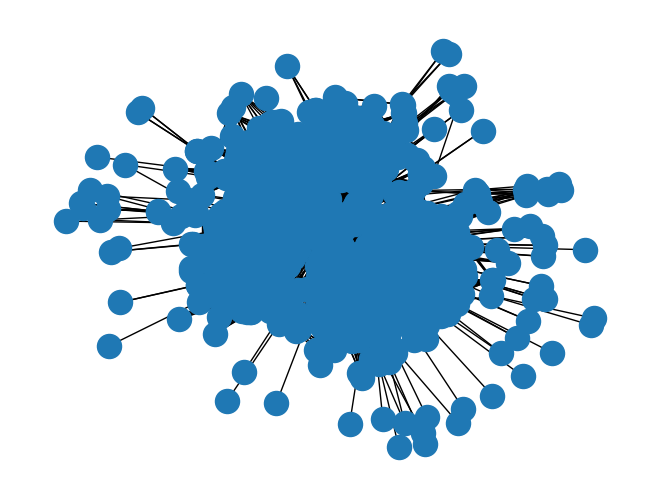

In [48]:
nx.draw(dg)
plt.draw()

In [51]:
pos = nx.spring_layout(dg, seed=3113794652)

In [ ]:
list(dg.nodes)

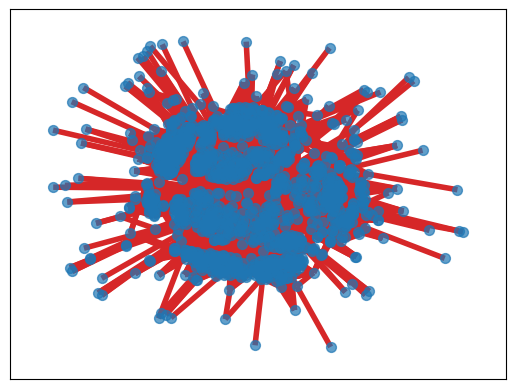

In [54]:
nx.draw_networkx_nodes(dg, pos, alpha=0.7, node_size=50, node_color="tab:blue")
nx.draw_networkx_edges(
    dg,
    pos,
    width=4,
    edge_color="tab:red",
)

In [55]:
nx.write_gexf(dg, "/Users/carboni/Downloads/test.gexf")

In [ ]:



#Draw regulated concept map


#PageRank calculation
p1 = nx.pagerank(dg, alpha=0.85)

#p1 to pr(dict to list)
pr = sorted(p1.items(), key=lambda x:x[1],reverse=True)[:10]

#print sorted ranking
for key,val in pr:
    print(key,val)